In [107]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [108]:
df=pd.read_csv("Loan2.csv")
df.head()

,Customer ID,Name,Gender,Age,Income (USD),Income Stability,Profession,Type of Employment,Location,Loan Amount Request (USD),...,Credit Score,No. of Defaults,Has Active Credit Card,Property ID,Property Age,Property Type,Property Location,Co-Applicant,Property Price,Loan Sanction Amount (USD)
0,C-36995,Frederica Shealy,F,56,1933.05,Low,Working,Sales staff,Semi-Urban,72809.58,...,809.44,0,NaN,746,1933.05,4,Rural,1,119933.46,54607.18
1,C-33999,America Calderone,M,32,4952.91,Low,Working,NaN,Semi-Urban,46837.47,...,780.40,0,Unpossessed,608,4952.91,2,Rural,1,54791.00,37469.98
2,C-3770,Rosetta Verne,F,65,988.19,High,Pensioner,NaN,Semi-Urban,45593.04,...,833.15,0,Unpossessed,546,988.19,2,Urban,0,72440.58,36474.43
3,C-26480,Zoe Chitty,F,65,NaN,High,Pensioner,NaN,Rural,80057.92,...,832.70,1,Unpossessed,890,NaN,2,Semi-Urban,1,121441.51,56040.54
4,C-23459,Afton Venema,F,31,2614.77,Low,Working,High skill tech staff,Semi-Urban,113858.89,...,745.55,1,Active,715,2614.77,4,Semi-Urban,1,208567.91,74008.28


In [109]:
df.shape

(30000, 24)

In [142]:
null_values = df.isnull().sum()
print(null_values)

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price (USD)           0
Loan Sanction Amount (USD)     0
dtype: int64


In [111]:
duplicates = df[df.duplicated(subset=['Customer ID'], keep=False)]
print(duplicates)

Empty DataFrame
Columns: [Customer ID, Name, Gender, Age, Income (USD), Income Stability, Profession, Type of Employment, Location, Loan Amount Request (USD), Current Loan Expenses (USD), Expense Type 1, Expense Type 2, Dependents, Credit Score, No. of Defaults, Has Active Credit Card, Property ID, Property Age, Property Type, Property Location, Co-Applicant, Property Price, Loan Sanction Amount (USD)]
Index: []

[0 rows x 24 columns]


In [112]:
df['Gender'] = df['Gender'].fillna('Rather not say')

In [113]:
min_age = df['Age'].min()
max_age = df['Age'].max()
print(f"Minimum Age: {min_age}")
print(f"Maximum Age: {max_age}")
Q1 = df['Age'].quantile(0.25)
Q3 = df['Age'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = df[(df['Age'] < lower_bound) | (df['Age'] > upper_bound)]
print("Outliers in Age column:")
print(outliers['Age'])

Minimum Age: 18
Maximum Age: 65
Outliers in Age column:
Series([], Name: Age, dtype: int64)


In [114]:
# Check for minimum and maximum values in the Income (USD) column
min_income = df['Income (USD)'].min()
max_income = df['Income (USD)'].max()

# Display the results
print(f"Minimum Income: {min_income}")
print(f"Maximum Income: {max_income}")
# Calculate the first and third quartiles (Q1 and Q3)
Q1 = df['Income (USD)'].quantile(0.25)
Q3 = df['Income (USD)'].quantile(0.75)

# Calculate the IQR
IQR = Q3 - Q1

# Define the lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Cap the outliers
df['Income (USD)'] = np.where(df['Income (USD)'] > upper_bound, upper_bound, df['Income (USD)'])
df['Income (USD)'] = np.where(df['Income (USD)'] < lower_bound, lower_bound, df['Income (USD)'])

# Verify the changes
print(df['Income (USD)'].describe())

Minimum Income: 377.7
Maximum Income: 1777460.21
count    25424.000000
mean      2473.136938
std       1120.844662
min        377.700000
25%       1650.457500
50%       2222.435000
75%       3090.592500
max       5250.795000
Name: Income (USD), dtype: float64


In [115]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

features = ['Age', 'Income Stability', 'Profession', 'Type of Employment', 'Location', 'Loan Amount Request (USD)', 'Current Loan Expenses (USD)', 'Dependents', 'Credit Score', 'Property Price', 'Income (USD)']
df_impute = df[features]

df_impute = pd.get_dummies(df_impute, columns=['Profession', 'Type of Employment', 'Location'], drop_first=True)

label_encoder = LabelEncoder()
df_impute['Income Stability'] = label_encoder.fit_transform(df_impute['Income Stability'])

imputer = KNNImputer(n_neighbors=5)

df_impute = pd.DataFrame(imputer.fit_transform(df_impute), columns=df_impute.columns)

df['Income (USD)'] = df_impute['Income (USD)']

print(df['Income (USD)'].isnull().sum()) 

0


In [116]:
mode_income_stability = df['Income Stability'].mode()[0]

# Impute missing values with the mode
df['Income Stability'] = df['Income Stability'].fillna(mode_income_stability)

# Verify the result
print(df['Income Stability'].isnull().sum())  

0


In [117]:
df['Type of Employment'] = df['Type of Employment'].fillna('Unknown')

# Verify the result
print(df['Type of Employment'].isnull().sum())


0


In [118]:

# Calculate the median of non-negative values in 'Current Loan Expenses (USD)'
median_expenses = df[df['Current Loan Expenses (USD)'] >= 0]['Current Loan Expenses (USD)'].median()

# Replace negative values with the median
df.loc[df['Current Loan Expenses (USD)'] < 0, 'Current Loan Expenses (USD)'] = median_expenses

# Optionally, print the result to verify
print("Replaced negative values with median in 'Current Loan Expenses (USD)':")
print(df['Current Loan Expenses (USD)'])



Replaced negative values with median in 'Current Loan Expenses (USD)':
0        241.08
1        495.81
2        171.95
3        298.54
4        491.41
          ...  
29995    722.34
29996    253.04
29997    583.11
29998    378.29
29999    693.94
Name: Current Loan Expenses (USD), Length: 30000, dtype: float64


Minimum expenses: 33.76
Maximum expenses: 3840.88


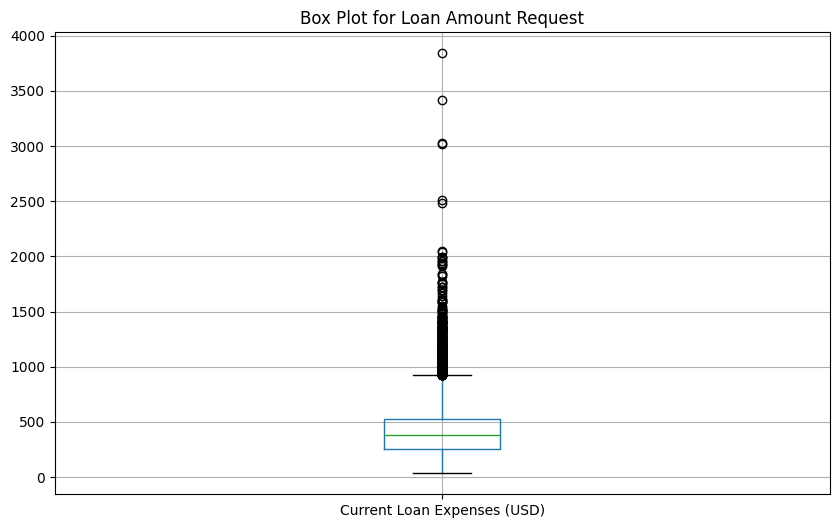

0        241.08
1        495.81
2        171.95
3        298.54
4        491.41
          ...  
29995    722.34
29996    253.04
29997    583.11
29998    378.29
29999    693.94
Name: Current Loan Expenses (USD), Length: 30000, dtype: float64


In [119]:
# Check for minimum and maximum values in the Income (USD) column
min_expenses = df['Current Loan Expenses (USD)'].min()
max_expenses = df['Current Loan Expenses (USD)'].max()

# Display the results
print(f"Minimum expenses: {min_expenses}")
print(f"Maximum expenses: {max_expenses}")

# Calculate Q1, Q3, and IQR
Q1 = df['Current Loan Expenses (USD)'].quantile(0.25)
Q3 = df['Current Loan Expenses (USD)'].quantile(0.75)
IQR = Q3 - Q1

# Identify outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.figure(figsize=(10, 6))
df.boxplot(column='Current Loan Expenses (USD)')
plt.title('Box Plot for Loan Amount Request')
plt.show()

# Replace outliers with upper or lower bound
df['Current Loan Expenses (USD)'] = np.where(
    df['Current Loan Expenses (USD)'] < lower_bound, lower_bound,
    np.where(df['Current Loan Expenses (USD)'] > upper_bound, upper_bound, df['Current Loan Expenses (USD)'])
)

print(df['Current Loan Expenses (USD)'])


In [120]:
from sklearn.impute import SimpleImputer

# Initialize SimpleImputer with strategy='median'
imputer = SimpleImputer(strategy='median')

# Perform imputation on 'Current Loan Expenses (USD)'
df['Current Loan Expenses (USD)'] = imputer.fit_transform(df[['Current Loan Expenses (USD)']])

In [121]:

# Remove the columns 'Expense Type 1' and 'Expense Type 2'
df.drop(columns=['Expense Type 1', 'Expense Type 2'], inplace=True)

# Verify the result
print(df.columns)

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Dependents', 'Credit Score', 'No. of Defaults',
       'Has Active Credit Card', 'Property ID', 'Property Age',
       'Property Type', 'Property Location', 'Co-Applicant', 'Property Price',
       'Loan Sanction Amount (USD)'],
      dtype='object')


Number of outliers: 752
Outliers:
       Customer ID                Name Gender  Age  Income (USD)  \
7         C-11006    Clarinda Montana      F   45      3875.200   
87        C-27965    Jacklyn Jiggetts      F   61      3831.374   
141        C-4177        Xenia Rikard      F   42      2462.090   
164       C-46327  Minerva Straughter      M   38      2021.120   
199       C-48323       Julius Gitlin      M   22      5250.795   
...           ...                 ...    ...  ...           ...   
29800     C-44956             Ha Than      M   56      3697.990   
29811     C-14535    Leslie Cranfield      F   22      5002.090   
29833     C-16567     Marvella Devita      M   60      5250.795   
29904      C-5271      Londa Eisenman      M   60      5250.795   
29918      C-9504           Alaina Au      F   64      3483.690   

      Income Stability            Profession     Type of Employment  \
7                  Low         State servant               Managers   
87                

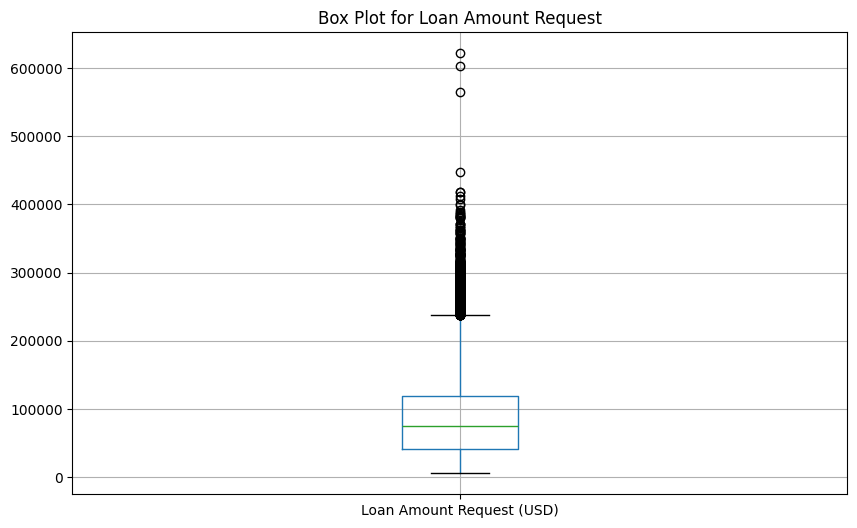

count     30000.000000
mean      87817.437653
std       56222.583017
min        6048.240000
25%       41177.755000
50%       75128.075000
75%      119964.605000
max      238144.880000
Name: Loan Amount Request (USD), dtype: float64


In [122]:
Q1 = df['Loan Amount Request (USD)'].quantile(0.25)
Q3 = df['Loan Amount Request (USD)'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = df[(df['Loan Amount Request (USD)'] < lower_bound) | (df['Loan Amount Request (USD)'] > upper_bound)]
print("Number of outliers:", outliers.shape[0])
print("Outliers:\n", outliers)

plt.figure(figsize=(10, 6))
df.boxplot(column='Loan Amount Request (USD)')
plt.title('Box Plot for Loan Amount Request')
plt.show()

df['Loan Amount Request (USD)'] = np.where(df['Loan Amount Request (USD)'] > upper_bound, upper_bound, df['Loan Amount Request (USD)'])
df['Loan Amount Request (USD)'] = np.where(df['Loan Amount Request (USD)'] < lower_bound, lower_bound, df['Loan Amount Request (USD)'])

print(df['Loan Amount Request (USD)'].describe())

In [123]:
median_dependents = df['Dependents'].median()

# Fill null values in the 'Dependents' column with the median
df['Dependents'] = df['Dependents'].fillna(median_dependents)

# Verify the result
print(df['Dependents'].isnull().sum())  # Should output 0

0


In [124]:
# Check for minimum and maximum values in the Income (USD) column
min_score = df['Credit Score'].min()
max_score= df['Credit Score'].max()

# Display the results
print(f"Minimum score: {min_score}")
print(f"Maximum score: {max_score}")

Q1 = df['Credit Score'].quantile(0.25)
Q3 = df['Credit Score'].quantile(0.75)
IQR = Q3 - Q1

# Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Credit Score'] < lower_bound) | (df['Credit Score'] > upper_bound)]

# Print outliers
print("Potential outliers:")
print(outliers)

Minimum score: 580.0
Maximum score: 896.26
Potential outliers:
Empty DataFrame
Columns: [Customer ID, Name, Gender, Age, Income (USD), Income Stability, Profession, Type of Employment, Location, Loan Amount Request (USD), Current Loan Expenses (USD), Dependents, Credit Score, No. of Defaults, Has Active Credit Card, Property ID, Property Age, Property Type, Property Location, Co-Applicant, Property Price, Loan Sanction Amount (USD)]
Index: []

[0 rows x 22 columns]


In [125]:
median_score = df['Credit Score'].median()

# Impute missing values with the median
df['Credit Score'] = df['Credit Score'].fillna(median_score)


In [126]:
# Replace missing values with a new category
df['Has Active Credit Card'] = df['Has Active Credit Card'].fillna('Unknown')

In [127]:
import pandas as pd

# Assuming df is your DataFrame
# Calculate Q1, Q3, and IQR for 'Property Age'
Q1 = df['Property Age'].quantile(0.25)
Q3 = df['Property Age'].quantile(0.75)
IQR = Q3 - Q1

# Determine the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = df[(df['Property Age'] < lower_bound) | (df['Property Age'] > upper_bound)]

# Print outliers
print("Outliers in 'Property Age':")
print(outliers.shape[0])

Outliers in 'Property Age':
1105


In [128]:
numeric_df = df.select_dtypes(include=[float, int])

# Check correlation of numeric columns
correlation_matrix = numeric_df.corr()

# Print the correlation matrix
print("Correlation matrix for numeric columns:")
print(correlation_matrix)

Correlation matrix for numeric columns:
                                  Age  Income (USD)  \
Age                          1.000000     -0.044127   
Income (USD)                -0.044127      1.000000   
Loan Amount Request (USD)   -0.010068      0.431909   
Current Loan Expenses (USD) -0.027039      0.481015   
Dependents                  -0.079574      0.000981   
Credit Score                 0.125900      0.098338   
No. of Defaults              0.003573      0.003424   
Property ID                 -0.012358     -0.005897   
Property Age                -0.010341      0.133480   
Property Type                0.002196      0.004878   
Co-Applicant                 0.000632     -0.000680   
Property Price              -0.009819      0.410839   
Loan Sanction Amount (USD)   0.008112      0.316574   

                             Loan Amount Request (USD)  \
Age                                          -0.010068   
Income (USD)                                  0.431909   
Loan Amount Req

In [129]:
# Drop the 'Property Age' column from the DataFrame
df = df.drop(columns=['Property Age'])

# Optionally, print the DataFrame to verify
print("DataFrame after removing 'Property Age':")
print(df.head())


DataFrame after removing 'Property Age':
  Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56      1933.050              Low   
1     C-33999  America Calderone      M   32      4952.910              Low   
2      C-3770      Rosetta Verne      F   65       988.190             High   
3     C-26480         Zoe Chitty      F   65      2597.666             High   
4     C-23459       Afton Venema      F   31      2614.770              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                Unknown  Semi-Urban                   46837.47   
2  Pensioner                Unknown  Semi-Urban                   45593.04   
3  Pensioner                Unknown       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   ...  Depende

In [130]:
property_type_mapping = {
    1: 'Single-family Home',
    2: 'Multi-family Home',
    3: 'Commercial Property',
    4: 'Land'
}

df['Property Type'] = df['Property Type'].map(property_type_mapping)

print("DataFrame with labeled 'Property Type' column:")
print(df[['Property Type']].head())

DataFrame with labeled 'Property Type' column:
       Property Type
0               Land
1  Multi-family Home
2  Multi-family Home
3  Multi-family Home
4               Land


In [131]:

mode_location = df['Property Location'].mode()[0]

# Fill missing values with the mode
df['Property Location'].fillna(mode_location, inplace=True)

# Optionally, print the DataFrame to verify
print("DataFrame after mode imputation:")
print(df['Property Location'].value_counts())


DataFrame after mode imputation:
Property Location
Semi-Urban    10743
Rural         10041
Urban          9216
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_17608\2978195186.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Property Location'].fillna(mode_location, inplace=True)


In [132]:

df['Co-Applicant'] = df['Co-Applicant'].replace(-999, pd.NA)

# Optionally, print the DataFrame to verify
print("DataFrame after replacing -999 with NaN in 'Co-Applicant' column:")
print(df['Co-Applicant'].value_counts(dropna=False))


DataFrame after replacing -999 with NaN in 'Co-Applicant' column:
Co-Applicant
1       25516
0        4316
<NA>      168
Name: count, dtype: int64


In [133]:

mode_co_applicant = df['Co-Applicant'].mode()[0]

# Fill missing values with the mode using assignment
df['Co-Applicant'] = df['Co-Applicant'].fillna(mode_co_applicant)

# Optionally, print the DataFrame to verify
print("DataFrame after mode imputation in 'Co-Applicant' column:")
print(df['Co-Applicant'].value_counts())


DataFrame after mode imputation in 'Co-Applicant' column:
Co-Applicant
1    25684
0     4316
Name: count, dtype: int64


C:\Users\Admin\AppData\Local\Temp\ipykernel_17608\2736544486.py:4: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Co-Applicant'] = df['Co-Applicant'].fillna(mode_co_applicant)


In [134]:
# Assuming df is your DataFrame

# Check unique values in the 'Co-Applicant' column
unique_values = df['Co-Applicant'].unique()

# Print the unique values
print("Unique values in 'Co-Applicant' column:")
print(unique_values)


Unique values in 'Co-Applicant' column:
[1 0]


In [135]:
# Calculate median (or mean)
median_price = df['Property Price'].median()

# Replace negative values with median
df['Property Price'] = df['Property Price'].apply(lambda x: median_price if x == -999 else x)


Potential outliers:
       Property Price
7           401040.70
87          437535.71
111         364087.25
129         391691.70
164         519776.20
...               ...
29706       356382.10
29794       412897.31
29811       451889.33
29833       371981.50
29904       498738.14

[898 rows x 1 columns]


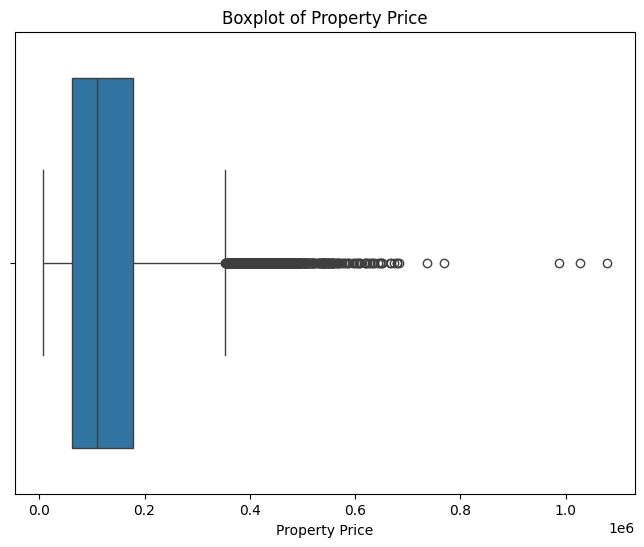

In [136]:
# Assuming df is your DataFrame
Q1 = df['Property Price'].quantile(0.25)
Q3 = df['Property Price'].quantile(0.75)
IQR = Q3 - Q1
# Calculate bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = df[(df['Property Price'] < lower_bound) | (df['Property Price'] > upper_bound)]

# Print outliers
print("Potential outliers:")
print(outliers[['Property Price']])
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Property Price'])
plt.title('Boxplot of Property Price')
plt.xlabel('Property Price')
plt.show()


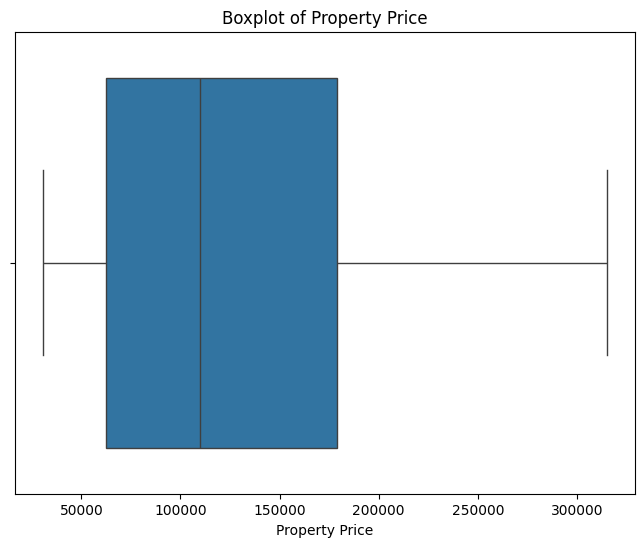

In [137]:
from scipy.stats.mstats import winsorize

# Winsorize at 95th percentile
winsorized_prices = winsorize(df['Property Price'], limits=[0.05, 0.05])
df['Property Price'] = winsorized_prices
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Property Price'])
plt.title('Boxplot of Property Price')
plt.xlabel('Property Price')
plt.show()


In [138]:
import numpy as np

df['Loan Sanction Amount (USD)'] = df['Loan Sanction Amount (USD)'].apply(lambda x: np.nan if x < 0 else x)

median_loan_sanction = df['Loan Sanction Amount (USD)'].median()

# Replace null values with median
df['Loan Sanction Amount (USD)'] = df['Loan Sanction Amount (USD)'].fillna(median_loan_sanction)

# Print updated DataFrame
print(df)


      Customer ID               Name Gender  Age  Income (USD)  \
0         C-36995   Frederica Shealy      F   56      1933.050   
1         C-33999  America Calderone      M   32      4952.910   
2          C-3770      Rosetta Verne      F   65       988.190   
3         C-26480         Zoe Chitty      F   65      2597.666   
4         C-23459       Afton Venema      F   31      2614.770   
...           ...                ...    ...  ...           ...   
29995     C-43723  Angelyn Clevenger      M   38      4969.410   
29996     C-32511       Silas Slaugh      M   20      1606.880   
29997      C-5192       Carmelo Lone      F   49      4036.050   
29998     C-12172      Carolann Osby      M   38      2417.710   
29999     C-33003  Bridget Garibaldi      F   63      3068.240   

      Income Stability            Profession     Type of Employment  \
0                  Low               Working            Sales staff   
1                  Low               Working                Unkno

Potential outliers:
       Loan Sanction Amount (USD)
87                      193769.26
215                     218144.06
247                     197685.17
267                     187299.89
285                     184930.53
...                           ...
29538                   200448.61
29615                   218412.38
29658                   251531.18
29904                   211006.16
29918                   225112.08

[453 rows x 1 columns]


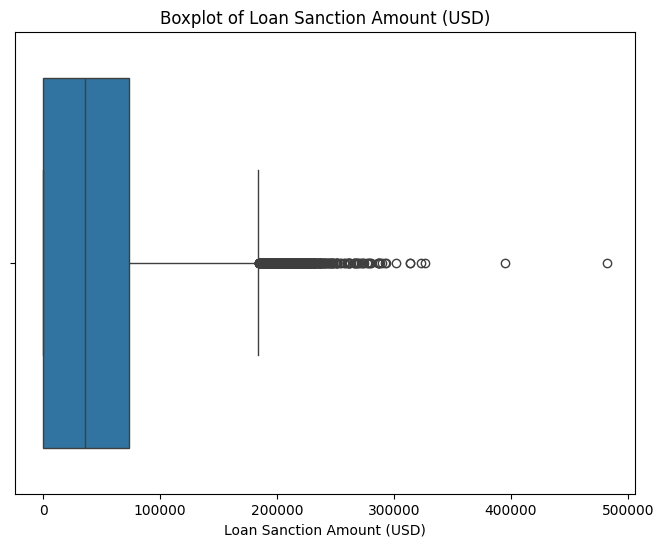

In [139]:
# Assuming df is your DataFrame
Q1 = df['Loan Sanction Amount (USD)'].quantile(0.25)
Q3 = df['Loan Sanction Amount (USD)'].quantile(0.75)
IQR = Q3 - Q1
# Calculate bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
# Identify outliers
outliers = df[(df['Loan Sanction Amount (USD)'] < lower_bound) | (df['Loan Sanction Amount (USD)'] > upper_bound)]

# Print outliers
print("Potential outliers:")
print(outliers[['Loan Sanction Amount (USD)']])
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Loan Sanction Amount (USD)'])
plt.title('Boxplot of Loan Sanction Amount (USD)')
plt.xlabel('Loan Sanction Amount (USD)')
plt.show()


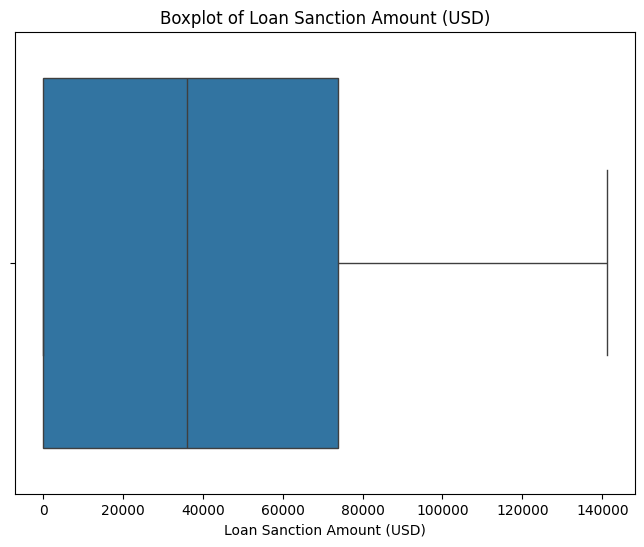

In [140]:
from scipy.stats.mstats import winsorize

# Winsorize at 95th percentile
winsorized_amount = winsorize(df['Loan Sanction Amount (USD)'], limits=[0.05, 0.05])
df['Loan Sanction Amount (USD)'] = winsorized_amount
plt.figure(figsize=(8, 6))
sns.boxplot(x=df['Loan Sanction Amount (USD)'])
plt.title('Boxplot of Loan Sanction Amount (USD)')
plt.xlabel('Loan Sanction Amount (USD)')
plt.show()


In [141]:
df.rename(columns={'Property Price': 'Property Price (USD)'}, inplace=True)

In [143]:
df.to_csv('Loan2u.csv', index=False)